<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning%20/clase_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Sesgo y Varianza en Machine Learning

En el entrenamiento de modelos de machine learning supervisado, es importante entender dos conceptos fundamentales: **sesgo (bias)** y **varianza (variance)**. Ambos están relacionados con la capacidad del modelo para generalizar a nuevos datos.

---

## 🔹 ¿Qué es el **sesgo**?

- El **sesgo** mide cuán lejos están las predicciones del modelo respecto al valor real objetivo.
- Un **sesgo alto** ocurre cuando el modelo es demasiado simple para captar la complejidad de los datos (por ejemplo, una regresión lineal sobre un patrón no lineal).
- Un **sesgo bajo** indica que el modelo representa bien la relación entre variables.

---

## 🔹 ¿Qué es la **varianza**?

- La **varianza** mide cuánto cambian las predicciones del modelo al usar diferentes datos de entrenamiento.
- Una **varianza alta** indica que el modelo se ajusta demasiado a los datos de entrenamiento (sobreajuste).
- Una **varianza baja** muestra que el modelo es más estable frente a diferentes muestras.

---

## 📊 Relación entre Sesgo y Varianza

|                        | Baja Varianza                         | Alta Varianza                         |
|------------------------|---------------------------------------|---------------------------------------|
| **Alta Predisposición (Sesgo Alto)** | Predicciones agrupadas pero lejos del objetivo (error sistemático). | Predicciones dispersas y lejos del objetivo. |
| **Baja Predisposición (Sesgo Bajo)** | Predicciones agrupadas y cercanas al objetivo (lo ideal). | Predicciones dispersas alrededor del objetivo. |

---

## ⚖️ ¿Qué papel juegan las regularizaciones L1 y L2?

Las regularizaciones **L1 (Lasso)** y **L2 (Ridge)** son técnicas que ayudan a **limitar la complejidad del modelo**, para encontrar un equilibrio entre sesgo y varianza.

- **L1 Regularization (Lasso)**:
  - Tiende a reducir algunos coeficientes a cero (eliminación de variables).
  - Útil para modelos más simples y con menos variables.

- **L2 Regularization (Ridge)**:
  - Reduce todos los coeficientes sin llevarlos a cero.
  - Hace que el modelo sea más robusto y con menor varianza.

Ambas técnicas ayudan a evitar el **sobreajuste** y mejorar la **capacidad de generalización** del modelo.

---

## 🧠 Conclusión

- **Sesgo alto** → modelo demasiado simple.
- **Varianza alta** → modelo demasiado complejo.
- La clave está en encontrar un **buen equilibrio** (trade-off).
- Las técnicas de **regularización L1 y L2** son herramientas para controlar este equilibrio.



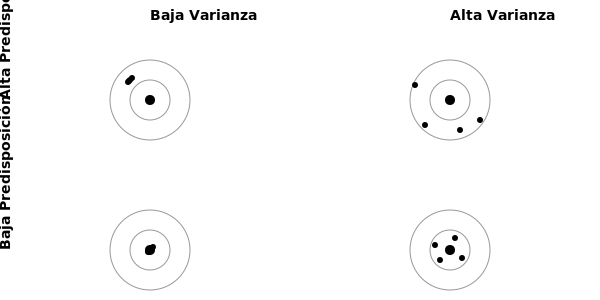

In [1]:
from IPython.display import SVG, display

svg_code = '''
<svg width="600" height="300" xmlns="http://www.w3.org/2000/svg">
  <style>
    .title { font: bold 14px sans-serif; }
    .label { font: 12px sans-serif; text-anchor: middle; }
  </style>

  <!-- Column titles -->
  <text x="150" y="20" class="title">Baja Varianza</text>
  <text x="450" y="20" class="title">Alta Varianza</text>

  <!-- Row titles -->
  <text x="10" y="100" class="title" transform="rotate(-90 10,100)">Alta Predisposición</text>
  <text x="10" y="250" class="title" transform="rotate(-90 10,250)">Baja Predisposición</text>

  <!-- Dianas (círculos) -->
  <!-- Alta predisposición - baja varianza -->
  <g transform="translate(150, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-20" cy="-20" r="3" fill="black" />
    <circle cx="-22" cy="-18" r="3" fill="black" />
    <circle cx="-18" cy="-22" r="3" fill="black" />
    <circle cx="-21" cy="-19" r="3" fill="black" />
  </g>

  <!-- Alta predisposición - alta varianza -->
  <g transform="translate(450, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="30" cy="20" r="3" fill="black" />
    <circle cx="-35" cy="-15" r="3" fill="black" />
    <circle cx="10" cy="30" r="3" fill="black" />
    <circle cx="-25" cy="25" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - baja varianza -->
  <g transform="translate(150, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="3" cy="-3" r="3" fill="black" />
    <circle cx="-2" cy="2" r="3" fill="black" />
    <circle cx="1" cy="1" r="3" fill="black" />
    <circle cx="0" cy="0" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - alta varianza -->
  <g transform="translate(450, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-15" cy="-5" r="3" fill="black" />
    <circle cx="12" cy="8" r="3" fill="black" />
    <circle cx="5" cy="-12" r="3" fill="black" />
    <circle cx="-10" cy="10" r="3" fill="black" />
  </g>
</svg>
'''

display(SVG(svg_code))


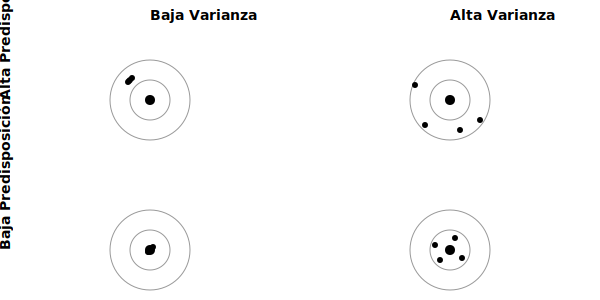

In [2]:
from IPython.display import SVG, display

svg_code = '''
<svg width="600" height="300" xmlns="http://www.w3.org/2000/svg">
  <style>
    .title { font: bold 14px sans-serif; }
    .label { font: 12px sans-serif; text-anchor: middle; }
  </style>

  <!-- Fondo blanco -->
  <rect x="0" y="0" width="600" height="300" fill="white" />

  <!-- Column titles -->
  <text x="150" y="20" class="title">Baja Varianza</text>
  <text x="450" y="20" class="title">Alta Varianza</text>

  <!-- Row titles -->
  <text x="10" y="100" class="title" transform="rotate(-90 10,100)">Alta Predisposición</text>
  <text x="10" y="250" class="title" transform="rotate(-90 10,250)">Baja Predisposición</text>

  <!-- Dianas -->
  <!-- Alta predisposición - baja varianza -->
  <g transform="translate(150, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-20" cy="-20" r="3" fill="black" />
    <circle cx="-22" cy="-18" r="3" fill="black" />
    <circle cx="-18" cy="-22" r="3" fill="black" />
    <circle cx="-21" cy="-19" r="3" fill="black" />
  </g>

  <!-- Alta predisposición - alta varianza -->
  <g transform="translate(450, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="30" cy="20" r="3" fill="black" />
    <circle cx="-35" cy="-15" r="3" fill="black" />
    <circle cx="10" cy="30" r="3" fill="black" />
    <circle cx="-25" cy="25" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - baja varianza -->
  <g transform="translate(150, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="3" cy="-3" r="3" fill="black" />
    <circle cx="-2" cy="2" r="3" fill="black" />
    <circle cx="1" cy="1" r="3" fill="black" />
    <circle cx="0" cy="0" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - alta varianza -->
  <g transform="translate(450, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-15" cy="-5" r="3" fill="black" />
    <circle cx="12" cy="8" r="3" fill="black" />
    <circle cx="5" cy="-12" r="3" fill="black" />
    <circle cx="-10" cy="10" r="3" fill="black" />
  </g>
</svg>
'''

display(SVG(svg_code))


## Videos de explicación

primer video
[![Mira el video en YouTube](https://img.youtube.com/vi/uomXFxBGMvA/0.jpg)](https://youtu.be/uomXFxBGMvA?si=tUrC_eczm_VcLMqQ)


segundo video
[![Mira el video en YouTube](https://img.youtube.com/vi/ezbDtmFIQPU/0.jpg)](https://youtu.be/ezbDtmFIQPU?si=0xLEPVzWbJXAh6Vd)

